In [14]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

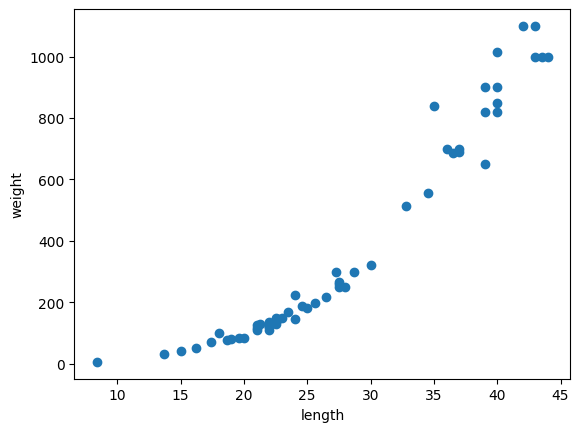

In [15]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
len(perch_length)
len(perch_weight)
print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [18]:
print(train_input)
#print(test_input)
#print(train_target)
#print(test_target)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


In [19]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


In [20]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [21]:
#좋은 모델은 score가 train이 test보다 더 높아야 한다.
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.992809406101064
0.9698823289099254


In [22]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [23]:
t_input = test_input[2]
print(t_input.reshape(-1, 1))
p = knr.predict(t_input.reshape(1, -1))
print(p)

[[27.5]]
[248.]


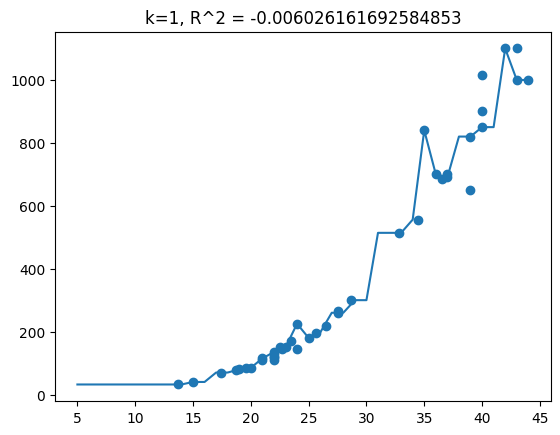

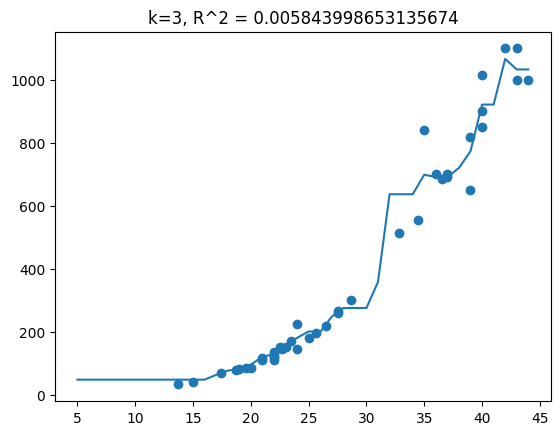

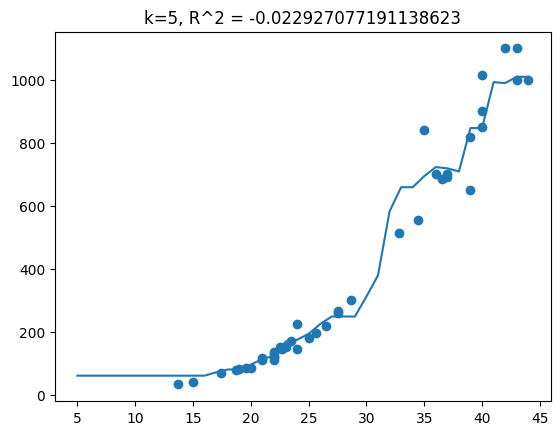

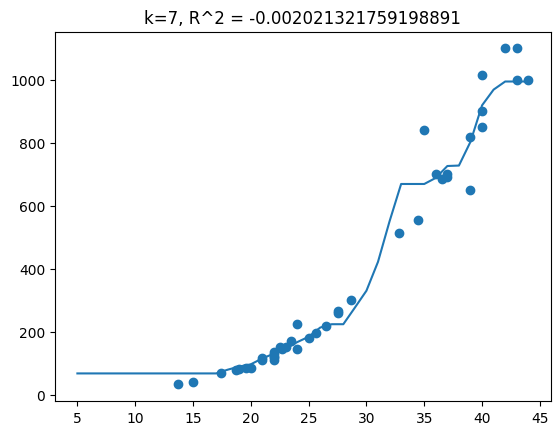

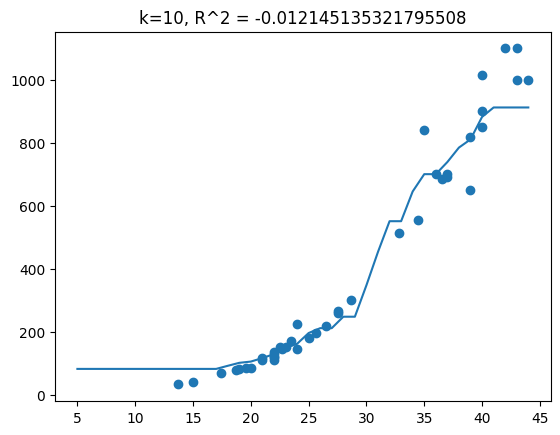

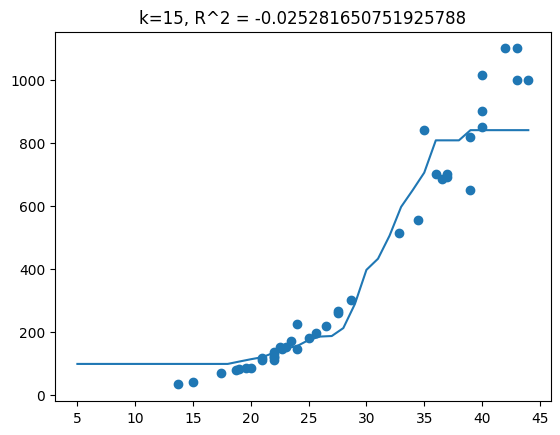

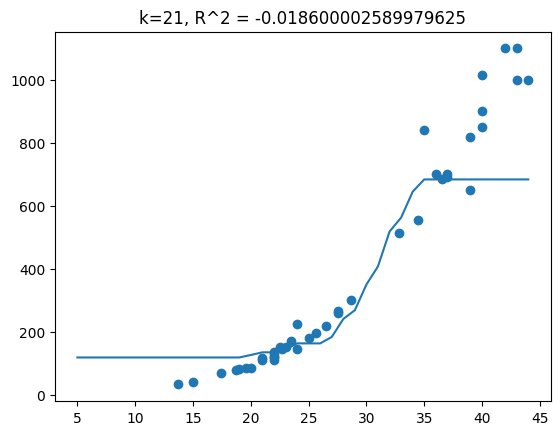

In [24]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for k in [1, 3, 5, 7, 10, 15, 21]:
    knr.n_neighbors = k
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

    #결정계수
    s_train = knr.score(train_input, train_target)
    s_test = knr.score(test_input, test_target)

    plt.title(f'k={k}, R^2 = {s_train-s_test}')
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.show()

In [25]:
knr.n_neighbors=3 #기본값은 5
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [26]:
for i in range(42, 51):
    prediction = knr.predict([[i]])
    print(i, prediction)

42 [1066.66666667]
43 [1033.33333333]
44 [1033.33333333]
45 [1033.33333333]
46 [1033.33333333]
47 [1033.33333333]
48 [1033.33333333]
49 [1033.33333333]
50 [1033.33333333]


In [32]:
#이웃을 찾아 차트로 그리기
distance, indexes = knr.kneighbors([[50]])
print(distance, indexes)

[[6. 7. 7.]] [[34  8 14]]


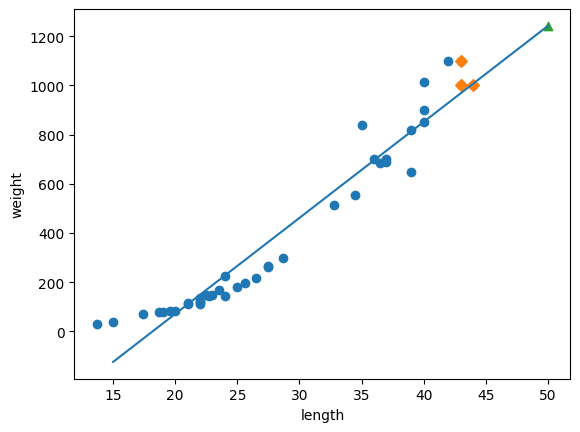

In [36]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [75]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


In [79]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.8247503123313559


In [99]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [85]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


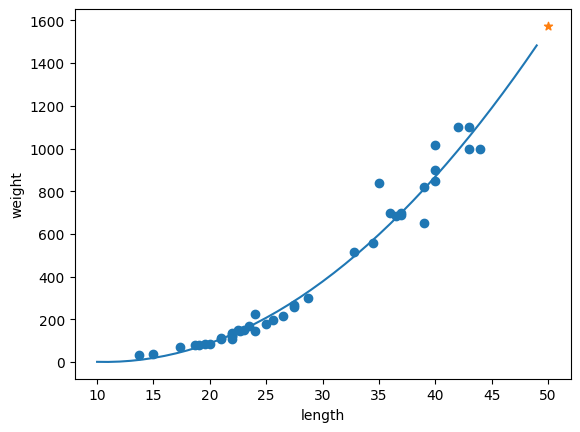

In [104]:
point = np.arange(10, 50)
plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6 * point + 116.05)

plt.scatter(50, 1574, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()